In [1]:
# 💡 NOTE: Runs this jupyter notebook from the projects root, mimicking a root run.
import os
# ⭐️ NOTE: Set num_to_move to how many directories it takes from this file to reach project root.
num_to_move = 1
os.chdir(os.getcwd().rsplit("/", num_to_move)[0])
print("RUNNING FROM: ->>",os.getcwd())

import torch
# # Show all values when printing torch tensors.
torch.set_printoptions(threshold=torch.inf) # shows all the values when printing tensors


# Reloads external functions when its code changes into this notebook.
%load_ext autoreload
%autoreload 1
# %aimport will only reload those files
# %aimport utils.bboxes

RUNNING FROM: ->> /Users/tonyavis/Main/AI_public_projects/object_detection/yolo_v1_orig


In [2]:
from PIL import Image
import torchvision.transforms as transforms

## Test Dataset Data Labels

In [3]:
from data.voc_dataset import VOCDataset
from configs.config_loader import load_config
from data.utils.setup_transforms import setup_transforms
from data.utils.bbox_extraction import extract_and_convert_label_bboxes

%aimport data.utils.bbox_extraction

In [4]:
cfg = load_config("config_voc_dataset.yaml", print_configs=False, verify_ask_user=False)

In [5]:
t = setup_transforms(cfg.IMAGE_SIZE)
d = VOCDataset(cfg, which_dataset=cfg.TRAIN_DIR_NAME, transforms=t)

In [6]:
img_tensor, boxes_t = d.__getitem__(5)
boxes_t.shape

torch.Size([7, 7, 30])

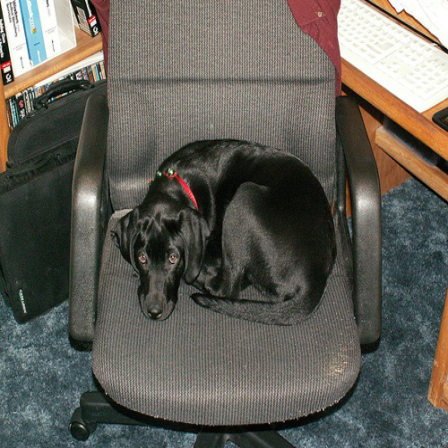

In [7]:
to_pil = transforms.ToPILImage() # convert tensor to PIL Image
pil_image = to_pil(img_tensor)
pil_image

### Extract And Convert Bounding Boxes To Corner-Points With Absolute Values 

In [8]:
boxes_t = boxes_t.unsqueeze(0)
boxes_t.shape

torch.Size([1, 7, 7, 30])

In [9]:
from data.utils.bbox_extraction import extract_and_convert_label_bboxes
boxes_corner_abs = extract_and_convert_label_bboxes(cfg=cfg, labels=boxes_t)
boxes_corner_abs, boxes_corner_abs.shape 

(tensor([[  0.0000,   4.0000,   1.0000, 110.2080, 137.3867, 339.5840, 328.5333]]),
 torch.Size([1, 7]))

In [10]:
boxes_corner_abs.shape

torch.Size([1, 7])

## Plot

In [11]:
from utils.plot.plot_bboxes import plot_bbox
%aimport utils.plot.plot_bboxes

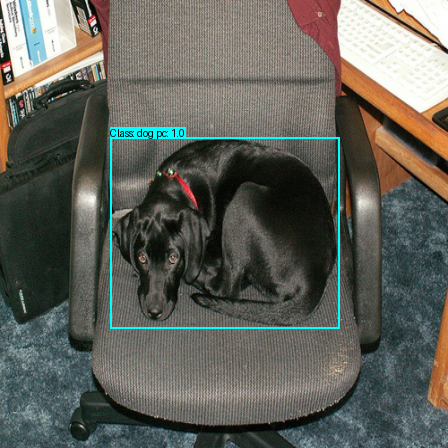

In [12]:
image_plot = pil_image.copy()
plot_bbox(cfg, bboxes=boxes_corner_abs, image=pil_image.copy())